# NumPy basics
## Data 765 tutoring

[NumPy](https://numpy.org/) is one of the central packages of the scientific Python ecosystem. NumPy implements accelerated array operations using [optimized, low level loops](https://chelseatroy.com/2018/11/07/code-mechanic-numpy-vectorization/) as well as [BLAS](https://numpy.org/devdocs/user/building.html) libraries.

NumPy is important because array operations are central in maths. Vectors and matrices are easy to represent as arrays. Basic formulas; such as averages, standard deviation, or effect size; are all implemented with arrays/vectors/matrices. Means are calculated by summing up the elements of an array and dividing by the length. Machine or statistical learning is also just vector and matrix operations. In other words, linear algebra is central to what we do, and fast array (i.e. vector or matrix) operations greatly improve our quality of life.

[Pandas](https://pandas.pydata.org/) is an in memory columnar data frame library that is built on NumPy. Understanding NumPy helps with pandas as well as the rest of Python's science ecosystem. You will often use NumPy directly in service to some goal you have with the other scientific libraries.

# Lists, arrays, primitives, and composites

Python is popular for both enthusiasts as well as casual programmers. For enthusiasts, Python is a clean language with great [FFI](https://en.wikipedia.org/wiki/Foreign_function_interface) support which allows easy interfacing to lower level languages such as C or [Rust](https://www.rust-lang.org/). For newbies, Python has, well, those same two benefits without casual programmers having to think about what that means. NumPy is one of the Python ecosystem's greatest boons, and the library relies on lower level code for speed.

But why?

Python follows the [principle of least astonishment](https://en.wikipedia.org/wiki/Principle_of_least_astonishment). Python reasonably tries to do what you expect it to do. `print()` takes in variadic arguments and doesn't require extensive formatting unless desired. The standard library is fully featured to the point of including Tk bindings. `list`s store any object rather than being limited to a single type as with arrays and Vectors in Rust or C and C++. Rust and the like aren't inferior to Python or needlessly difficult; they have different goals and targets. Lower level languages are closer to the hardware which engenders great speed and power. However, that also means that a programmer must code closer to how a computer works as well.

Python is a higher level language which means that it is more abstracted from the hardware. That allows certain built in and automatically enabled features that would be undesirable in a lower level language. For example, Python's base integer is [arbitrarily precise](https://en.wikipedia.org/wiki/Arbitrary-precision_arithmetic) which means you can do this:

In [1]:
big_long = 10**10000
print(big_long)

1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

BigInts are not always beneficial as an immediately enabled feature. Other languages usually require a library that implements BigInts. Instead, those languages have integer types that are fixed in size. Rust has unsigned and signed 8 bit, 16 bit, 32 bit, 64 bit, and 128 bit [integers](https://doc.rust-lang.org/std/index.html#primitives). Thus, integers in Rust have a fixed minimum and maximum size just like Python's floats. Working with integers of those sizes are very efficient for CPUs. Arbitrary precision requires extra logic for every calculation which slows down operations. Plain integers as well as floats and characters are known as primitive types.

**NumPy uses [primitives](https://numpy.org/doc/stable/user/basics.types.html) to speed up calculations** rather than defaulting to Python's composite integer type. You can use Python's integer with NumPy of course.

Arrays in lower level languages are "limited" to a single type because they're a block of contiguous memory. Accessing each element is fast and cheap. CPUs have special instructions collectively known as **Single Instruction, Multiple Data** or [SIMD](https://en.wikipedia.org/wiki/SIMD) to speed up operations, such as math, even more on blocks of data. SIMD relies on a block of data that can be processed in chunks.

You can think of rubber stamping a stack of papers for a small, somewhat correct analogy. Imagine you're working at some dismal firm where your job is to rubber stamp each sheet of paper in a stack. Which of these two processes would be faster?

* The papers are in a box with giraffe figures, staplers, books, laptops, unrelated documents, and other office accoutrements. You have to manually fetch and check each sheet before smacking it with your stamp.
* Your stack of papers are impeccably organized so that you can quickly slide off each paper and stamp the left corner while expending next to no mental energy.

The second situation is obviously faster. Computers are more complicated, but the analogy works pretty well.

Python's default `list` is the second situation because it can store different types that are not contiguous. For example:

In [2]:
hammerspace = ["Cat", 42, 54., 100**100, {"FPS": "Doom"}, []]

print(f"hammerspace: {id(hammerspace)}")
print(f"hammerspace[0]: {id(hammerspace[0])}")
print(f"hammerspace[1]: {id(hammerspace[1])}")
print(f"hammerspace[3]: {id(hammerspace[2])}")
print(f"hammerspace[4]: {id(hammerspace[4])}")
print(f"hammerspace[5]: {id(hammerspace[5])}")

hammerspace: 1925273729096
hammerspace[0]: 1925272815408
hammerspace[1]: 140721286626608
hammerspace[3]: 1925273669936
hammerspace[4]: 1925273573080
hammerspace[5]: 1925273728840


Not even the numbers are stored in order. Even if they were stored in order by chance, there's no guarantee that subsequent runs would be contiguous. Python's `list` stores pointers to objects so that different types may be stored. Pointers are just a number that refers to a memory location; you can think of them as addresses for houses or buildings. The address must be dereferenced or followed in order to get to the object (or "building"). Following a pointer for each object in a `list` will always have overhead. Dereferencing pointers that all refer to different locations is like traveling to multiple buildings around a city.

NumPy's `ndarray` abstracts over contiguous low level arrays; and uses fast loops, BLAS, and SIMD for speed. NumPy is exponentially faster than using `list`s. Let's take a look!

# NumPy arrays
So, NumPy arrays must be super difficult to create, right?

**WRONG.**

NumPy provides a clean set of APIs to create arrays. Using NumPy isn't much more difficult than Python's `list`. NumPy has a large repertoire of [array creation routines](https://numpy.org/doc/stable/reference/routines.array-creation.html) that you should familiarize yourselves with.

The main issue is that you should use NumPy's types over storing Python's `object`s. More on that in a bit.

[numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) creates an `ndarray` from a Python object that can be turned into an array object, such as a `list`.

In [3]:
import numpy as np
a_list = [14, 28, 42]
a = np.array(a_list)

NumPy's `arange()` function can be used to directly create an array over a specified range.

In [4]:
a = np.arange(0, 32, 2)
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

`arange()` takes the same parameters as Python's built-in `range()` as demonstrated above.

NumPy can create the typical sorts of vectors or matrices you'd expect such as an identity matrix or an array of zeroes or filled with a certain value. Spaced vectors are similarly easy to create. Here is a linearly spaced array using [numpy.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace). The generated array consists of 25 linearly spaced samples between 0 to 10.

In [5]:
a = np.linspace(0, 10, 25)
a

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

You can explore the API for more examples.

# Array attributes

Replicated from [the documentation](https://numpy.org/doc/stable/user/quickstart.html).

* ndarray.ndim - Number of dimensions
* ndarray.shape - Size of each dimension as a `tuple`
* ndarray.size - Total size of the array (equivalent to taking the product of shape)
* ndarray.dtype - Type of the array. This will be important for pandas!
* ndarray.itemsize - Size in bytes of the type. For example a `float64` is eight bytes long.

In [6]:
print(f"a.ndim: {a.ndim}")
print(f"a.shape: {a.shape}")
print(f"a.size: {a.size}")
print(f"a.dtype: {a.dtype}")
print(f"a.itemsize: {a.itemsize}")

a.ndim: 1
a.shape: (25,)
a.size: 25
a.dtype: float64
a.itemsize: 8


`a` only has one dimension and a shape of 25x1. We can reshape `a` to 1x25 with the [reshape()](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) method.

In [7]:
a = a.reshape(1, -1)
print(f"a.ndim: {a.ndim}")
print(f"a.shape: {a.shape}")
print(f"a.size: {a.size}")

a.ndim: 2
a.shape: (1, 25)
a.size: 25


`-1` as a dimension size means to automatically fill in the size. Thus, a 1xn reshape of our 25x1 vector would be a 1x25 vector if we pass in `-1` to the second dimension for reshape.

Here's a matrix.

In [8]:
m = np.linspace(0, 15).reshape(10, -1)
print(f"m.shape: {a.shape}")
print(f"m.ndim: {m.ndim}")
m

m.shape: (1, 25)
m.ndim: 2


array([[ 0.        ,  0.30612245,  0.6122449 ,  0.91836735,  1.2244898 ],
       [ 1.53061224,  1.83673469,  2.14285714,  2.44897959,  2.75510204],
       [ 3.06122449,  3.36734694,  3.67346939,  3.97959184,  4.28571429],
       [ 4.59183673,  4.89795918,  5.20408163,  5.51020408,  5.81632653],
       [ 6.12244898,  6.42857143,  6.73469388,  7.04081633,  7.34693878],
       [ 7.65306122,  7.95918367,  8.26530612,  8.57142857,  8.87755102],
       [ 9.18367347,  9.48979592,  9.79591837, 10.10204082, 10.40816327],
       [10.71428571, 11.02040816, 11.32653061, 11.63265306, 11.93877551],
       [12.24489796, 12.55102041, 12.85714286, 13.16326531, 13.46938776],
       [13.7755102 , 14.08163265, 14.3877551 , 14.69387755, 15.        ]])

# (Pseudo)random numbers

Truly random numbers are difficult to generate. Computers typically work via [pseudorandomness](https://www.redhat.com/en/blog/understanding-random-number-generators-and-their-limitations-linux). A pseudo random number generator (PRNG) is an algorithm that outputs numbers based on an initial seed (a number). The seed may originate from an unpredictable, random process such as mouse movement.

Algorithms output the same result if called with the same inputs. Thus, using the same seed twice would always generate the same sets of numbers. Randomness in computing is a combination of a PRNG with different seeds that are drawn from an entropy pool.

Data scientists usually set a seed for their PRNG for each project. The seed ensures reproducibility so that the randomness involved in probability and statistics is mitigated. You should have a [personal seed](https://stats.stackexchange.com/questions/80407/am-i-creating-bias-by-using-the-same-random-seed-over-and-over) but also test your work with different seeds before rerunning your project with a final seed. I tend to work _without_ a seed (i.e. using whatever seed I'm given at the moment) for a large chunk of my project before setting my final seed to `42` or `314` depending on my mood.

A personal seed that is always attributed to your work is like a seal of quality. Using the same personal seed over many projects indicates that you're not trying to bias your work in any way; this is similar to not messing with alphas to get a significant result. A personal seed also helps reproducibility.

Now let's take a look at NumPy's `random` module!

NumPy recently changed up their API for `random`, so I'll use the [newer API](https://numpy.org/doc/stable/reference/random/generator.html) instead of the [legacy style](https://numpy.org/doc/stable/reference/random/legacy.html#legacy) that you may see in textbooks.

We can create an instance of the random number generator with [numpy.random.default_rng()](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng). A seed or seeds may be passed into the constructor. Precluding the seed uses the default entropy pool.

In [9]:
# rng is now our random number generator.
rng = np.random.default_rng(42)

# Random floats with the shape 5x1
rfloats = rng.random(5)
rfloats

array([0.77395605, 0.43887844, 0.85859792, 0.69736803, 0.09417735])

As with the rest of the NumPy API, you can designate a shape for the output. The shape `5` returns a one dimensional array with five random floats. `random()` could obviously produce multidimensional arrays as well.

In [10]:
rfloats_mat = rng.random((3, 5))
rfloats_mat

array([[0.97562235, 0.7611397 , 0.78606431, 0.12811363, 0.45038594],
       [0.37079802, 0.92676499, 0.64386512, 0.82276161, 0.4434142 ],
       [0.22723872, 0.55458479, 0.06381726, 0.82763117, 0.6316644 ]])

NumPy's [Generator API](https://numpy.org/doc/stable/reference/random/generator.html) as well as the legacy API both have a useful list of functions for generating random numbers. You can take a look at the documentation for other functions as needed.

## Distributions

`Generator`s can return samples from different distributions such as the Gaussian, uniform, or binomial distributions.

In [11]:
# 1000 samples from a normal distribution with mean=14 and std=5
rnormal = rng.normal(14, 5, 1000)

# Binomial distribution
# 100 trials with a .6 probability of success repeated 25 times
rbinomial = rng.binomial(100, .6, 25)
rbinomial

array([60, 57, 59, 52, 58, 56, 52, 68, 55, 66, 60, 67, 57, 60, 54, 60, 58,
       52, 60, 54, 64, 60, 64, 58, 67], dtype=int64)

And let's visualize our normal distribution samples.

<AxesSubplot:title={'center':'Normal distribution μ=14, σ=5'}, xlabel='Samples', ylabel=' '>

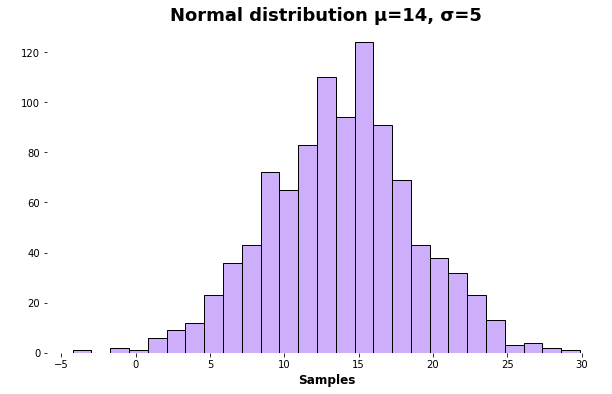

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

norm_fig, norm_ax = plt.subplots(figsize=(10, 6))

# Labels
norm_ax.set_title("Normal distribution μ=14, σ=5",
                  {"fontweight": "bold",
                   "fontsize": 18})
norm_ax.set_xlabel("Samples",
                   {"fontweight": "bold",
                    "fontsize": 12})
norm_ax.set_ylabel(' ')

# Minimalism
norm_ax.set_frame_on(False)

# Plot on customized axes
sns.histplot(rnormal,
             bins="fd",
             color="#bd93f9",
             ax=norm_ax)

An array can be permuted easily with the `Generator` API as well.

In [13]:
eeveelution = np.array(["Eevee",
                        "Vaporeon",
                        "Jolteon",
                        "Flareon",
                        "Espeon",
                        "Umbreon",
                        "Leafeon",
                        "Glaceon",
                        "Sylveon"])

# Permute returns a copy
eevees_shuffled = rng.permutation(eeveelution)
print(f"Permuted Eeveelutions: {eevees_shuffled}\n")

# Shuffle permutes in place
rng.shuffle(eevees_shuffled)
print(f"Shuffled Eeveelutions: {eevees_shuffled}")

Permuted Eeveelutions: ['Glaceon' 'Leafeon' 'Flareon' 'Eevee' 'Umbreon' 'Espeon' 'Vaporeon'
 'Jolteon' 'Sylveon']

Shuffled Eeveelutions: ['Sylveon' 'Leafeon' 'Jolteon' 'Umbreon' 'Eevee' 'Espeon' 'Vaporeon'
 'Flareon' 'Glaceon']


[Generator.choice()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) picks a number of elements from an `ndarray` with or without replacement. Probabilities may be provided to bias the sampling.

Sampling with replacement does not permanently remove an element from the pool. The element can appear multiple times.

In [14]:
# Choose two
two_eeveelutions = rng.choice(eeveelution, 2)
print(f"Two eeveelutions: {two_eeveelutions}\n")

# Espeons!!
biased_probs = [1/20 if pokemon != "Espeon" else 12/20
                for pokemon in eeveelution]
biased_eeveelutions = rng.choice(eeveelution,
                                 size=10,
                                 replace=True,
                                 p=biased_probs)
print(f"Biased sample: {biased_eeveelutions}")

Two eeveelutions: ['Vaporeon' 'Espeon']

Biased sample: ['Leafeon' 'Jolteon' 'Leafeon' 'Vaporeon' 'Flareon' 'Espeon' 'Vaporeon'
 'Vaporeon' 'Eevee' 'Espeon']


# Basic boolean arrays

NumPy arrays can be filtered by boolean arrays. Boolean arrays are simply arrays of all bools. Indexing an `ndarray` with a boolean array returns the subset of that `ndarray` where the boolean array is `True`.

In [15]:
more_floats = rng.random(10)
more_floats_filt = more_floats > 0.4

more_floats_filt

array([ True, False,  True,  True, False, False,  True,  True,  True,
        True])

`more_floats_filt` is a boolean array that is `True` where `more_floats` is greater than 0.4. We can filter `more_floats` with the boolean array to get an array with only the elements above 0.4.

In [16]:
larger_floats = more_floats[more_floats_filt]
larger_floats

array([0.77462388, 0.65225761, 0.82312732, 0.86080097, 0.82312461,
       0.53894177, 0.81919988])

Here's a more complex example.

In [17]:
more_eevees = rng.choice(eeveelution,
                         size=100,
                         replace=True)

more_eevees[(more_eevees == "Espeon") | (more_eevees == "Umbreon")]

array(['Espeon', 'Umbreon', 'Espeon', 'Espeon', 'Espeon', 'Umbreon',
       'Umbreon', 'Umbreon', 'Espeon', 'Espeon', 'Umbreon', 'Espeon',
       'Umbreon', 'Umbreon', 'Espeon', 'Espeon', 'Espeon', 'Umbreon',
       'Espeon', 'Umbreon', 'Umbreon', 'Espeon', 'Espeon', 'Umbreon',
       'Umbreon'], dtype='<U8')

# Universal functions

NumPy's ufuncs are accelerated versions of common math functions that work with n-dimensional arrays. You have access to common operations such as dot products, means, cumulative sums, et cetera. You should _always_ prefer NumPy functions when working with maths over Python's built in functions.

In [18]:
speed_test_np = rng.random(1000000)
dot_one = rng.random((3, 3))
dot_two = rng.random(3)

print(f"Mean: {np.mean(speed_test_np)}")
print(f"Standard deviation: {np.std(speed_test_np)}")
print(f"Dot product: {np.dot(dot_one, dot_two)}")

Mean: 0.5000322250848871
Standard deviation: 0.28863262792694827
Dot product: [0.87323744 1.15629227 0.80041143]


Normal operations are accelerated and broadcast as well.

In [19]:
x = rng.random(100)
epsilon = rng.normal(size=100)

# This works as expected with +
y = np.log(x) + epsilon

Finally, let's do a speed test for fun. First I'd like to convert `speed_test_np` to a Python `list` and import `statistics`.

In [20]:
import statistics

speed_test_lst = speed_test_np.tolist()

Next let's test base Python's functions' speed.

In [21]:
%%timeit
statistics.mean(speed_test_lst)

757 ms ± 9.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


And now NumPy.

In [22]:
%%timeit
np.mean(speed_test_np)

597 µs ± 4.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Notice the units! NumPy is exponentially faster!

[Next: pandas](https://github.com/joshuamegnauth54/data765-intro-python-tutoring/blob/main/notebooks/08-pandas.ipynb)